# Describing data (cont.)

In our last notebook, I guided you through different ways in which you can describe your data using **R**.

In this notebook, I will introduce two different topics:
    * more graphs
    * R packages

In the previous notebook we experimented a little bit with histograms, using the method *hist()*. In this notebook we will go a bit further and learn about other graphs that come handy when working with data.

We first need to load some data into **R**

In [1]:
spiderAmputation<-read.csv("~/Repos/rScripts/Data/chap03e2SpiderAmputation.csv")

If you inspect the data with *head* it looks like this:

In [2]:
head(spiderAmputation)

spider,speed,treatment
1,1.25,before
2,2.94,before
3,2.38,before
4,3.09,before
5,3.41,before
6,3.00,before


We can see that the table contains three variables:

    - spider
    - speed
    - treatment

we have no metadata for this dataset but we can deduce what happened from the name of the file and the name of the columns. And this is why it is so **important to give appropriate names to both files and variables when working with data!**

So, we are going to assume that a researcher took some spiders, cut one or more legs and measure the speed before and after the *treatment*.

We are interested in describing the results he obtained, and maybe testing whether the *treatment* had an effect on the speed of the spiders or not.

Just to see what happens, we use the method *summary()* on our dataset

In [3]:
summary(spiderAmputation)

     spider          speed        treatment 
 Min.   : 1.00   Min.   :1.250   after :16  
 1st Qu.: 4.75   1st Qu.:2.730   before:16  
 Median : 8.50   Median :3.195              
 Mean   : 8.50   Mean   :3.261              
 3rd Qu.:12.25   3rd Qu.:3.527              
 Max.   :16.00   Max.   :5.450              

I hope you see a difference between the columns.

If you don't, I'll tell you that the column *spider* is just an identifier for the spider used, *speed* is the actual measurement conducted and *treatment* is the experimental condition under which the spider was allowed to run.

We call the variable *treatment* a **factor** and the two possibilities, i.e. *after* and *before* (amputation), its **levels**. In statistical jargon we say we have a factor with two levels. It is really important that you learn how to read a dataset to determine which are the factors in it and how many levels they have because this will determine how you analyze the dataset.

In this experiment, which is very simple, we have one *independent variable* (this is another way to refer to factors) that we think affects the outcome of a *response variable*, speed in this case.

The rational of the experiment maybe was:

    - We observed that when spiders are injured they tend to be really fast, faster than when they are not injured and hypothesize that amputation causes a change in the speed with which a spider moves a give distance. We design an experiment to falsify or corroborate our hypothesis, gather data and now we need to analyze the data.
    
Because we only have one *response variable*, and in general we only analyze one *response variable* at a time, we want to start describing this variable using all the tools we learned already in our previous notebook.

**Exercise**

    1. What is the *Mean and Standard deviation* of the speed with which the spiders moved during the experiment?
    
    2. How does the histogram of the variable speed looks like?

In [4]:
mean(spiderAmputation$speed)

[1] 3.260937

In [5]:
sd(spiderAmputation$speed)

[1] 1.01916

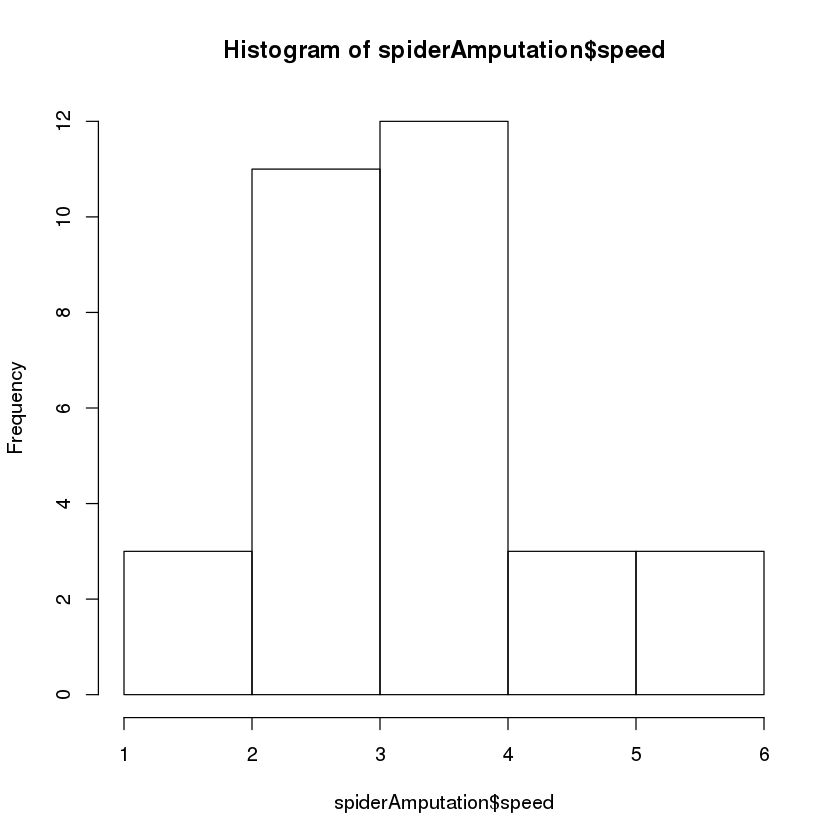

In [6]:
hist(spiderAmputation$speed)

When you use the method *hist()*, **R** will take the name of the variable and will use it as the label of the x-axis. In addition, it will use it to produce a title above the figure. In general, figures should be label with a legend that goes **after** the figure, not before, above or elsewhere. We can tell the method *hist()* to use a specific label for the x-axis or to print a specific title if we *pass* the text we want using different options provided by the method *hist()*.

A comprehensive list of all options accepted by *hist()* can be found typing *?hist*.

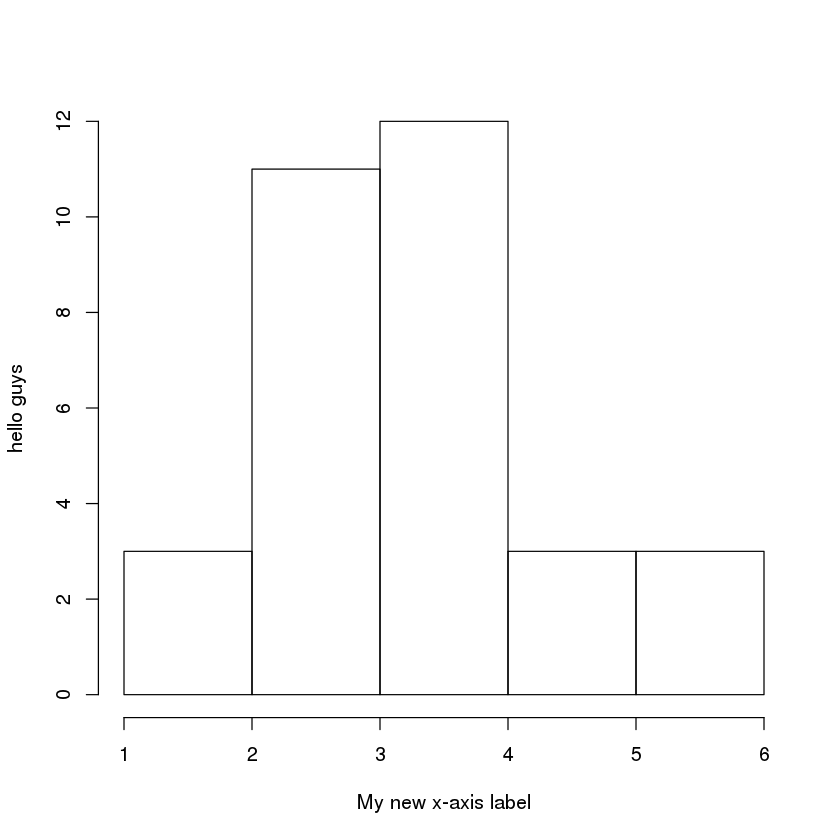

In [7]:
hist(spiderAmputation$speed, ylab="hello guys", xlab="My new x-axis label", main="")

Note that I just passed an empty string (of characters) as the main title of my histogram!

So far so good, but what are the problems with this graph? A clue, we had an independent variable somewhere. So, is it correct to just ignore that and pool all the data to report a summary or visualize it? In case you want to check the levels of a factor, you can call the method *levels()* on it.

In [8]:
levels(spiderAmputation$treatment)

[1] "after"  "before"

So, what to do?

well, we can use some funky tricks to select only those observations matching certain criterion.

In [9]:
subset(spiderAmputation, spiderAmputation$treatment == "before")

spider,speed,treatment
1,1.25,before
2,2.94,before
3,2.38,before
4,3.09,before
5,3.41,before
6,3.00,before
7,2.31,before
8,2.93,before
9,2.98,before
10,3.55,before


Note that *subset()* gives you a new reduced dataset. So, in order to plot a histogram, you need to specify the column in that dataset as well:

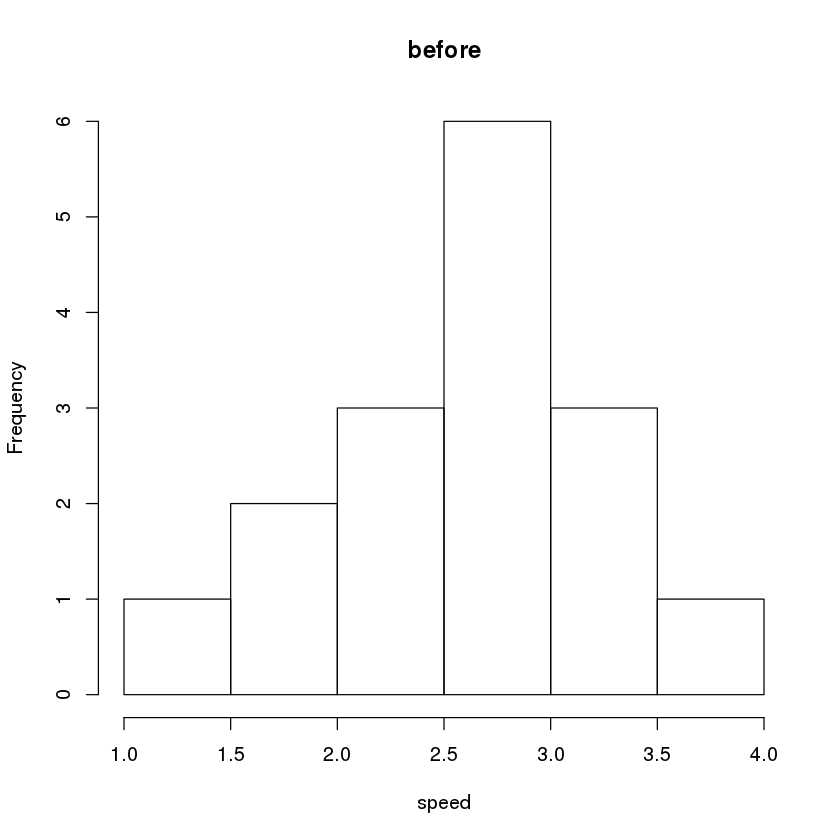

In [10]:
hist(subset(spiderAmputation, spiderAmputation$treatment=="before")$speed, xlab="speed", main="before")

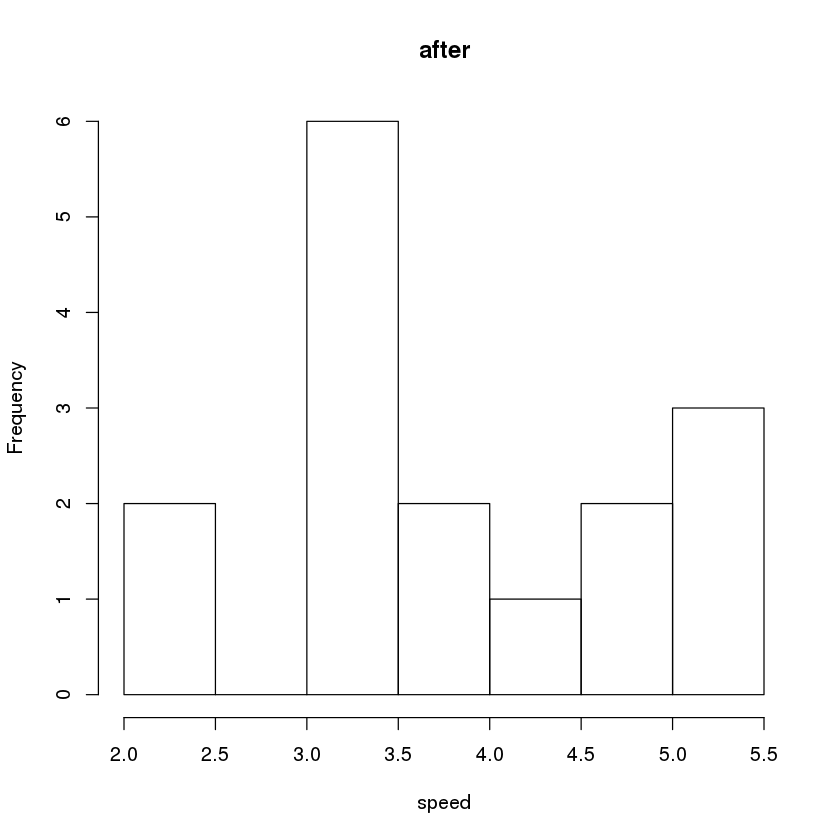

In [11]:
hist(subset(spiderAmputation, spiderAmputation$treatment=="after")$speed, xlab="speed", main="after")

In our case, because we only have two levels we could subset using a negation:

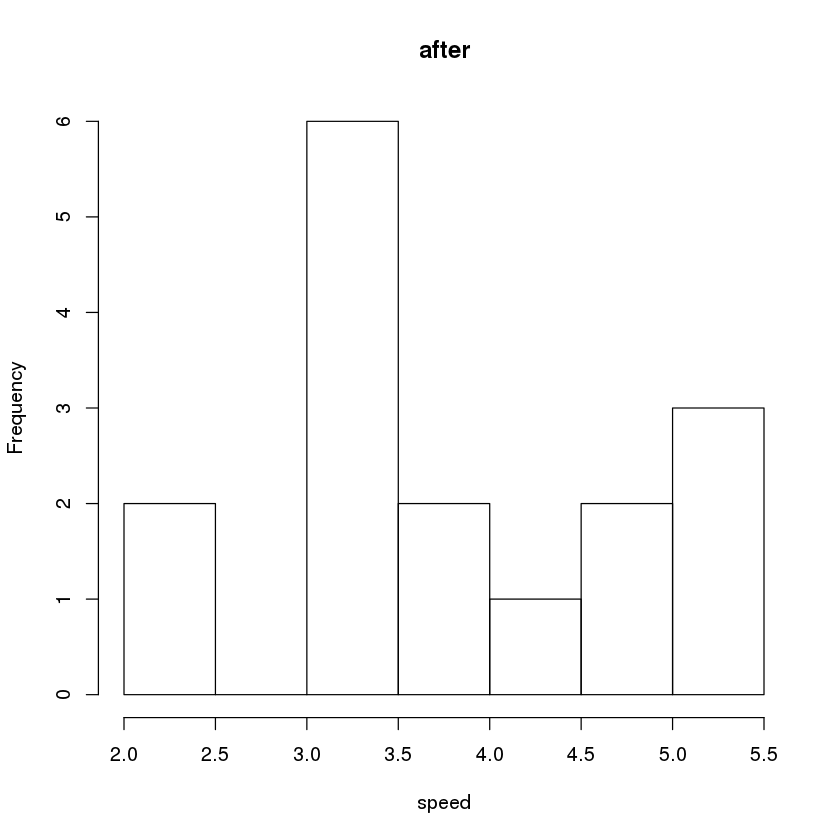

In [12]:
hist(subset(spiderAmputation, spiderAmputation$treatment!="before")$speed, xlab="speed", main="after")

Maybe you think it would be really cool to display both histograms on the same figure. You can achieve that calling a **lower level** method named *par()* which controls how things are displayed.

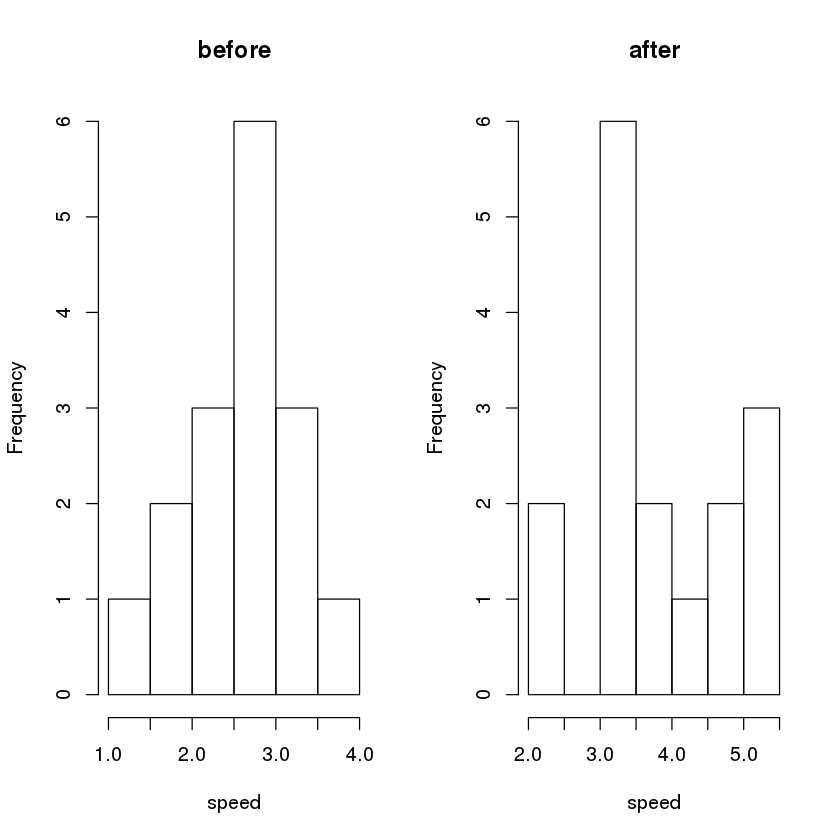

In [13]:
par(mfrow=c(1,2))
hist(subset(spiderAmputation, spiderAmputation$treatment=="before")$speed, xlab="speed", main="before")
hist(subset(spiderAmputation, spiderAmputation$treatment!="before")$speed, xlab="speed", main="after")

Histograms are nice, but we do not use them very often in scientific communication because they are not so explicit about measurements we care of, e.g. the mean and standard deviation. We have different options here:
    - we could subset and pass the subsetted dataset to the method mean() or sd() and get the results

In [14]:
spiderAmputationBeforeOnly<-subset(spiderAmputation, spiderAmputation$treatment=="before")
mean(spiderAmputationBeforeOnly$speed)
sd(subset(spiderAmputation, spiderAmputation$treatment=="before")$speed)
mean(subset(spiderAmputation, spiderAmputation$treatment!="before")$speed)
sd(subset(spiderAmputation, spiderAmputation$treatment!="before")$speed)


[1] 2.668125

[1] 0.6415525

[1] 3.85375

[1] 0.992632

    - we could use more fancy stuff

In [15]:
tapply(spiderAmputation$speed, spiderAmputation$treatment, mean)

after   before 
3.853750 2.668125

In [16]:
tapply(spiderAmputation$speed, spiderAmputation$treatment, sd)

after    before 
0.9926320 0.6415525

the method *tapply()* tabulates a variable by a factor and applies a method specified by the user to the subsets of data induced by the factor levels. Cool, or? Note that the results are presented in alphabetical order. This is because **R** thinks that factors should be ordered this way. If you want a different order you have to specify it using the method *relevel()* or *factor()*

In [17]:
spiderAmputation$treatment<-relevel(spiderAmputation$treatment, ref="before")
tapply(spiderAmputation$speed, spiderAmputation$treatment, mean)

before    after 
2.668125 3.853750

In [18]:
spiderAmputation$treatment<-factor(spiderAmputation$treatment, levels=c("after", "before"))
tapply(spiderAmputation$speed, spiderAmputation$treatment, mean)

after   before 
3.853750 2.668125

In [19]:
spiderAmputation$treatment<-factor(spiderAmputation$treatment, levels=c("before","after"))
tapply(spiderAmputation$speed, spiderAmputation$treatment, mean)

before    after 
2.668125 3.853750

I hope you see that you have lots of possibilities with **R** and that mastering **R** gives you lots of tools to tackle many different problems efficiently. I mentioned that histograms are not used often when we want to compare the distribution of a response variable across different levels of a factor. If you want to do this, we prefer **box-plots**.

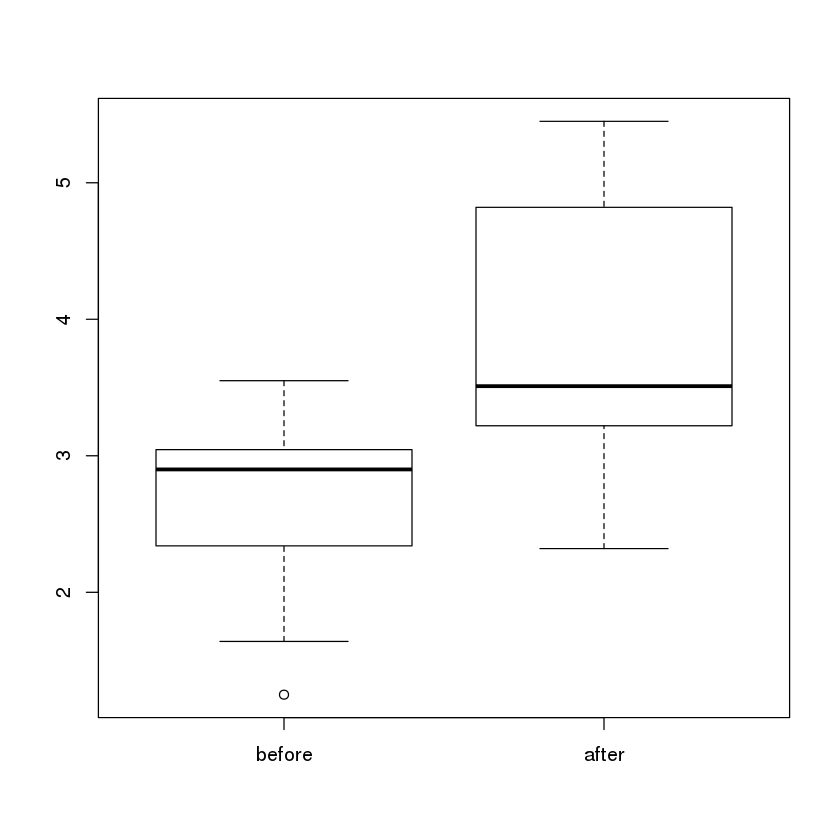

In [20]:
boxplot(spiderAmputation$speed~spiderAmputation$treatment)

That is of course easy. You can add the *mean* using the method points() after calling boxplot(). The line in the boxplot is the **median** not the **mean**, and the first and third quartiles, not the standard deviation. It also shows the range of the data and the outliers if any. If you want to add the **mean** as a dot:

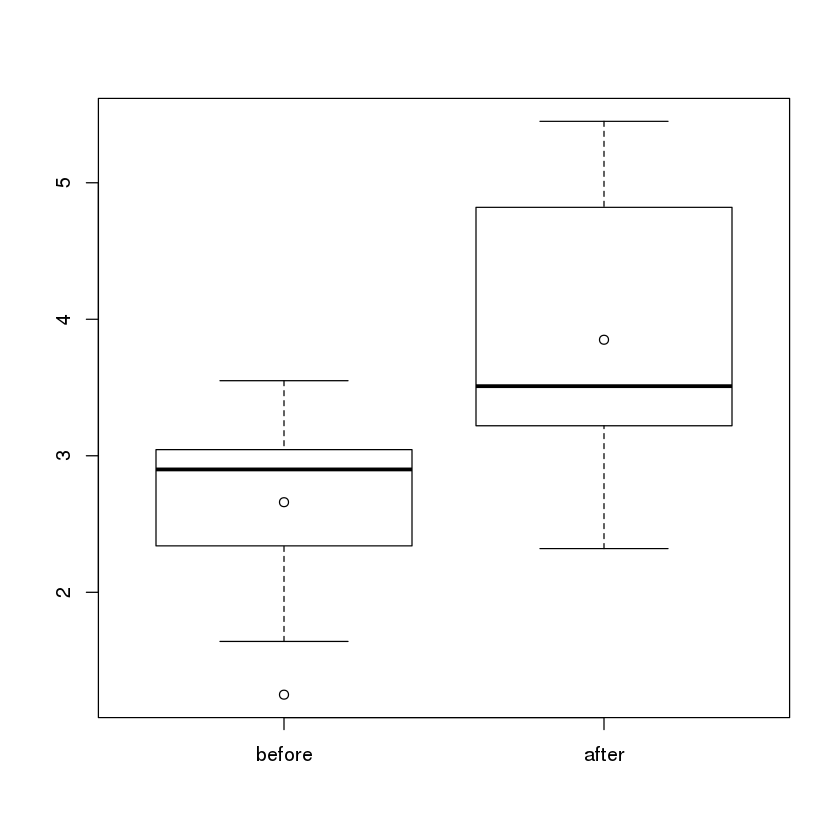

In [21]:
boxplot(spiderAmputation$speed~spiderAmputation$treatment)
points(1:2, c(2.66,3.85))